In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.efficientnet import EfficientNetB7, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
import seaborn as sns
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from tensorflow.keras import layers
import torch
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_50Aug/Train'
test_dir = '/content/drive/MyDrive/DR_50Aug/Test'

Mounted at /content/drive


In [3]:
# Load model for feature extraction
model = EfficientNetB7(weights='imagenet', include_top=False)

258076736/258076736 [==============================] - 2s 0us/step


In [4]:
# Function to extract features from an image
def extract_features_B7net(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [5]:
#load image and extract features
import os

x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_B7net(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 1s 673ms/step


In [6]:

# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_B7net(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 442ms/step


Training Bernoulli Naive Bayes...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


True Positives: 50
True Negatives: 800
False Positives: 200
False Negatives: 200
Accuracy: 0.68
Precision: 0.04032258064516129
Specificity: 0.8
Sensitivity: 0.2
F1 Score: 0.06711409395973153
Recall: 0.2



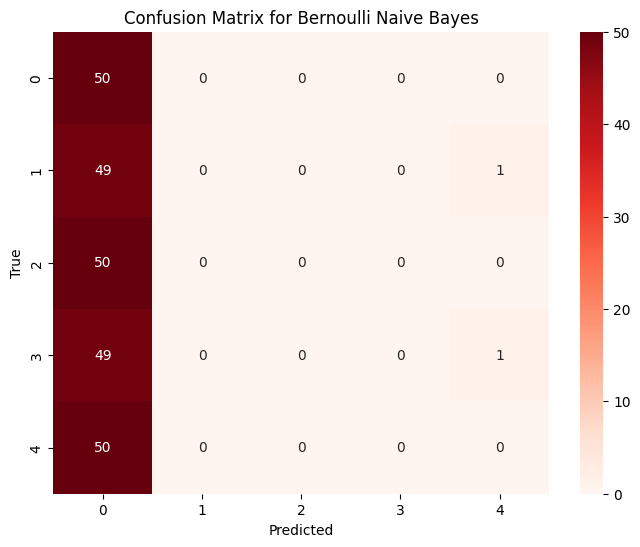

Training Multinomial Naive Bayes...
True Positives: 164
True Negatives: 914
False Positives: 86
False Negatives: 86
Accuracy: 0.8624
Precision: 0.6718638318203536
Specificity: 0.914
Sensitivity: 0.656
F1 Score: 0.6597305665349145
Recall: 0.656



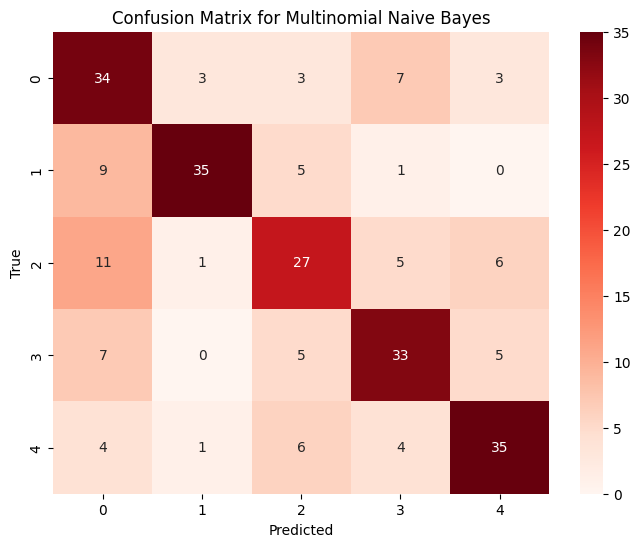

Training Complement Naive Bayes...
True Positives: 153
True Negatives: 903
False Positives: 97
False Negatives: 97
Accuracy: 0.8448
Precision: 0.6266882428647135
Specificity: 0.903
Sensitivity: 0.612
F1 Score: 0.5953946366020745
Recall: 0.612



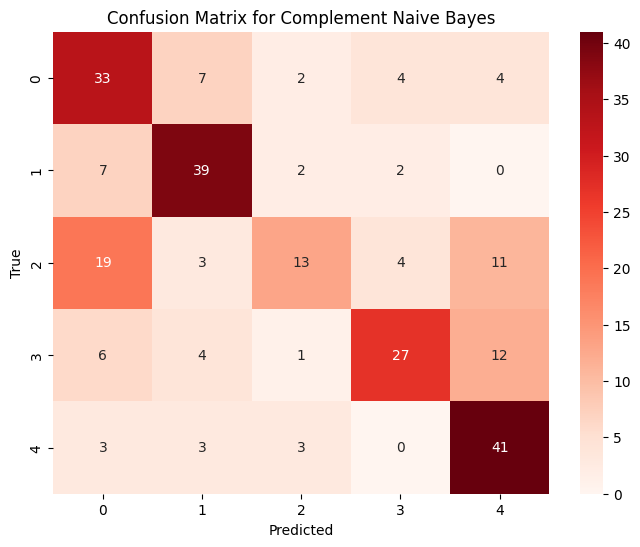

Training Gaussian Naive Bayes...
True Positives: 179
True Negatives: 929
False Positives: 71
False Negatives: 71
Accuracy: 0.8864
Precision: 0.7290338164251208
Specificity: 0.929
Sensitivity: 0.716
F1 Score: 0.7155654820067563
Recall: 0.716



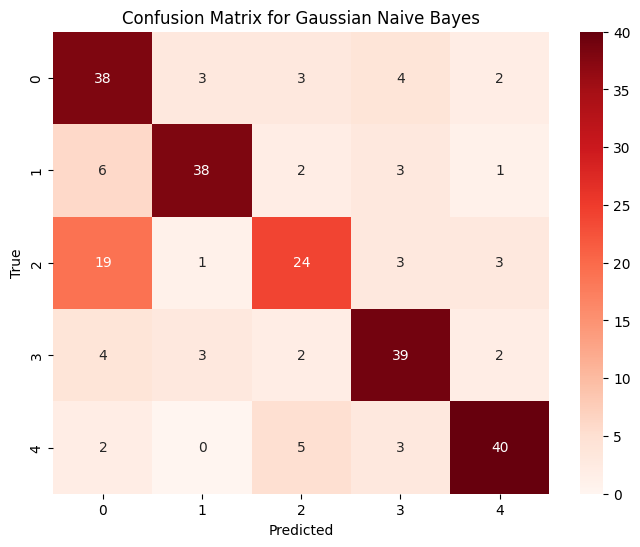

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
import numpy as np

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# Check for negative values and add a small positive constant if needed
if np.min(x_train_flat) < 0 or np.min(x_test_flat) < 0:
    min_val = min(np.min(x_train_flat), np.min(x_test_flat))
    x_train_flat += abs(min_val) + 0.1
    x_test_flat += abs(min_val) + 0.1

# List of classifiers to try
classifiers = [BernoulliNB, MultinomialNB, ComplementNB, GaussianNB]
classifier_names = ['Bernoulli Naive Bayes', 'Multinomial Naive Bayes', 'Complement Naive Bayes', 'Gaussian Naive Bayes']

for clf, name in zip(classifiers, classifier_names):
    print(f"\033[1mTraining {name}...\033[0m")

    # Train classifier
    model = clf()
    model.fit(x_train_flat, y_train)

    # Predict on test set
    y_pred = model.predict(x_test_flat)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute TP, TN, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    num_classes = cm.shape[0]
    TN = []
    for i in range(num_classes):
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))

    # Compute overall TP, TN, FP, FN
    overall_TP = np.sum(TP)
    overall_TN = np.sum(TN)
    overall_FP = np.sum(FP)
    overall_FN = np.sum(FN)

    # Compute accuracy, precision, specificity, sensitivity, F1-score, recall
    accuracy = (overall_TP + overall_TN) / (overall_TP + overall_TN + overall_FP + overall_FN)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = overall_TN / (overall_TN + overall_FP)

    # Print performance metrics
    print(f'True Positives: {overall_TP}')
    print(f'True Negatives: {overall_TN}')
    print(f'False Positives: {overall_FP}')
    print(f'False Negatives: {overall_FN}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Specificity: {specificity}')
    print(f'Sensitivity: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Recall: {recall}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


In [8]:
print(f"Minimum value in x_train_flat: {np.min(x_train_flat)}")
print(f"Minimum value in x_test_flat: {np.min(x_test_flat)}")

Minimum value in x_train_flat: 0.09999999403953552
Minimum value in x_test_flat: 0.09999999403953552
Minimum value in x_train_flat: 0.09999999403953552
Minimum value in x_test_flat: 0.09999999403953552
